## Load MNIST on Python 3.x

In [26]:
import pickle
import gzip
import os

In [27]:
filename = './Datasets/mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
print(training_data[1].shape)
f.close()

(50000,)


## Load USPS on Python 3.x

In [28]:
from PIL import Image
import os
import numpy as np

In [29]:
USPSMat  = []
USPSTar  = []
curPath  = './Datasets/USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)

## Data

In [30]:
X_train,y_train = training_data[0],training_data[1]
X_valid,y_valid = validation_data[0],validation_data[1]
X_test,y_test = test_data[0],test_data[1]
fea = 28

## Logistic Regression 

In [31]:
import numpy as np
#<------------**************** 1. logistic regression ********************----------------->


X_train,y_train = training_data[0],training_data[1]
X_valid,y_valid = validation_data[0],validation_data[1]
X_test,y_test = test_data[0],test_data[1]
fea = 28

num = 50000
dim = 784  #28 x_train 28
classes = 10 #corresponds to each digit 
target = np.zeros((num,1))
x_train = np.zeros((num,dim))
#----------training------------  
x_train = X_train
target = y_train

print("############ 1. logistic regression  ###########")

num_class = np.zeros((num,classes))

for i in range(0,num):
    num_class[i][target[i]] = 1

init_weight = np.random.rand(dim,classes) # randomly assigned initial weights

b_k = 1
eta = 0.01  # learning rate


a_k_arr = np.dot(x_train, init_weight) + b_k
y_k_bin = np.zeros((num,classes))

a_j_sum = np.zeros((1,classes))

a_exp = np.exp(a_k_arr)

a_j_sum = np.matrix.sum(np.matrix(a_exp), axis =1)

y_k_bin = a_exp/a_j_sum

w = init_weight #use w for updation of weights

x_arr = np.zeros((1,784))

for j in range(0,10): 
    for i in range(0,50000):
        x_arr = np.reshape(x_train[i], (1,784))
       
        a_k_new =  np.dot(x_arr, w) + b_k
        a_exp_new = np.exp(a_k_new)
        a_j_sum_new = np.matrix.sum(np.matrix(a_exp_new), axis =1)
        y_k_bin = a_exp_new/a_j_sum_new
        w += np.dot(eta , np.dot( np.transpose(x_arr)  ,np.subtract(num_class[i] ,y_k_bin)))

a_k_new =  np.dot(x_train, w) + b_k

a_exp_new = np.exp(a_k_new)  
a_j_sum_new = np.matrix.sum(np.matrix(a_exp_new), axis =1)

y_k_new = a_exp_new/a_j_sum_new

#classification and find error rate

c = np.argmax(y_k_new, axis=1)

n_corr=0
for i in range(0,50000):   # correct count
    if(c[i]==target[i]):
        n_corr += 1
print("Accuracy- training set")
print (float(n_corr)/num)

#-------------validation----------------------------------

x_train = X_valid
target_valid = y_valid

b_k_valtn = np.ones((10000,1))

a_k_valtn =  np.dot(x_train, w) + b_k_valtn
a_exp_valtn = np.exp(a_k_valtn) 
a_j_sum_valtn = np.matrix.sum(np.matrix(a_exp_valtn), axis =1)

y_k_valtn = a_exp_valtn/a_j_sum_valtn

#classification and find error rate

c = np.argmax(y_k_valtn, axis=1)

n_corr=0
for i in range(0,10000):
    if(c[i]==target_valid[i]): # correct count
        n_corr += 1
print ("Accuracy - validation set" )       
print (float(n_corr)/10000)

#-------------testing----------------------------------

x_train = X_test
target_test = y_test


b_k_tst = np.ones((10000,1))

a_k_valtn =  np.dot(x_train, w) + b_k_tst

a_exp_valtn = np.exp(a_k_valtn)  
a_j_sum_valtn = np.matrix.sum(np.matrix(a_exp_valtn), axis =1)

y_k_valtn = a_exp_valtn/a_j_sum_valtn

#classification and find error rate

c_mnist_test = np.argmax(y_k_valtn, axis=1)

n_corr_mnist_test=0
for i in range(0,10000): # correct count
    if(c_mnist_test[i]==target_test[i]):
        n_corr_mnist_test += 1
print ("Accuracy - testing set")       
print (float(n_corr_mnist_test )/10000)
test_mnist_acc = float(n_corr_mnist_test )/10000


#--------testing USPS data --------------

x_train = USPSMat
target_valid = USPSTar

b_k_valtn = np.ones((19999,1))

a_k_valtn =  np.dot(x_train, w) + b_k_valtn

a_exp_valtn = np.exp(a_k_valtn) 
a_j_sum_valtn = np.matrix.sum(np.matrix(a_exp_valtn), axis =1)

y_k_valtn = a_exp_valtn/a_j_sum_valtn

#classification

c_usps_test = np.argmax(y_k_valtn, axis=1)

n_corr_usps_test=0
for i in range(0,19999):
    if(c_usps_test[i]==target_valid[i]):
        n_corr_usps_test += 1
print ("Accuracy - testing USPS data" )       
print (float(n_corr_usps_test)/19999)
test_usps_acc = float(n_corr_usps_test)/19999


############ 1. logistic regression  ###########
Accuracy- training set
0.91954
Accuracy - validation set
0.9208
Accuracy - testing set
0.9125
Accuracy - testing USPS data
0.30781539076953846


In [32]:
# c_mnist_test
# c_usps_test
# test_mnist_acc | test_usps_acc
c_usps_test

matrix([[9],
        [2],
        [0],
        ...,
        [7],
        [1],
        [7]])

In [47]:
lr = np.squeeze(np.asarray(c_usps_test))

In [48]:
lr

array([9, 2, 0, ..., 7, 1, 7])

## Random Forest

In [33]:
import numpy
import random
from numpy import arange

# Sklearn Imports
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.externals import joblib

X_train,y_train = training_data[0],training_data[1]
X_valid,y_valid = validation_data[0],validation_data[1]
X_test,y_test = test_data[0],test_data[1]
fea = 28

# Training
print('Training...')
clf_rf = RandomForestClassifier(n_estimators=10,n_jobs=2)
clf_rf.fit(X_train,y_train)
#joblib.dump(clf_rf, '/RadmForest.joblib')

# Valdiation
print('Validating....')
pred = clf_rf.predict(X_valid)

# Evaluation
print('Evaluating Validation Results...')
print('----------------------------------')
print('Precision : {}'.format(metrics.precision_score(y_valid,pred,average='weighted')))
print('Recall : {}'.format(metrics.recall_score(y_valid,pred,average='weighted')))
print('F1 Score : {}'.format(metrics.f1_score(y_valid,pred,average='weighted')))
print('Accuracy : {}'.format(metrics.accuracy_score(y_valid,pred)))
print('Mean Accuracy : {}\n'.format(clf_rf.score(X_valid,y_valid)))

# Testing :: MNIST Dataset
predict_test = clf_rf.predict(X_test)
print('Testing Results :: MNIST Dataset ...')
print('--------------------------------------')
print('Precision : {}'.format(metrics.precision_score(y_test,predict_test,average='weighted')))
print('Recall : {}'.format(metrics.recall_score(y_test,predict_test,average='weighted')))
print('F1 Score : {}'.format(metrics.f1_score(y_test,predict_test,average='weighted')))
print('Accuracy : {}'.format(metrics.accuracy_score(y_test,predict_test)))
print('Mean Accuracy : {}\n'.format(clf_rf.score(X_test,y_test)))


#-------------------- X --------------------- X --------------------
# Testing :: USPS Dataset
predict_test_usps = clf_rf.predict(USPSMat)
print('Testing Results :: USPS Dataset ...')
print('--------------------------------------')
print('Precision : {}'.format(metrics.precision_score(USPSTar,predict_test_usps,average='weighted')))
print('Recall : {}'.format(metrics.recall_score(USPSTar,predict_test_usps,average='weighted')))
print('F1 Score : {}'.format(metrics.f1_score(USPSTar,predict_test_usps,average='weighted')))
print('Accuracy : {}'.format(metrics.accuracy_score(USPSTar,predict_test_usps)))
print('Mean Accuracy : {}'.format(clf_rf.score(USPSMat,USPSTar)))

Training...
Validating....
Evaluating Validation Results...
----------------------------------
Precision : 0.9525066177792418
Recall : 0.9525
F1 Score : 0.9523923341326412
Accuracy : 0.9525
Mean Accuracy : 0.9525

Testing Results :: MNIST Dataset ...
--------------------------------------
Precision : 0.9466675310394334
Recall : 0.9466
F1 Score : 0.9464681342532542
Accuracy : 0.9466
Mean Accuracy : 0.9466

Testing Results :: USPS Dataset ...
--------------------------------------
Precision : 0.31865230768854325
Recall : 0.30591529576478826
F1 Score : 0.2874935094293345
Accuracy : 0.30591529576478826
Mean Accuracy : 0.30591529576478826


In [16]:
clf_rf.predict_proba(USPSMat)

array([[0. , 0. , 0. , ..., 0.2, 0. , 0.1],
       [0. , 0. , 0.6, ..., 0.1, 0. , 0.1],
       [0.3, 0. , 0.1, ..., 0. , 0. , 0.1],
       ...,
       [0. , 0.1, 0. , ..., 0.2, 0. , 0.3],
       [0. , 0.3, 0. , ..., 0.1, 0.3, 0.2],
       [0. , 0. , 0. , ..., 0.2, 0.1, 0.3]])

In [50]:
rf = predict_test_usps

In [51]:
rf

array([4, 0, 0, ..., 4, 1, 3])

## MLP

In [35]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.externals import joblib
from sklearn.metrics import classification_report

X_train,y_train = training_data[0],training_data[1]
X_valid,y_valid = validation_data[0],validation_data[1]
X_test,y_test = test_data[0],test_data[1]
fea = 28

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=50, alpha=1e-4,solver='sgd',verbose=10, tol=1e-4, random_state=1,learning_rate_init=.1)

#clf_mlp = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
mlp.fit(X_train,y_train)

# Best parameter set
#print('Best parameters found:\n', mlp.best_params_)

# Predict
# Validation :: MNIST
y_pred_mlp_valid = mlp.predict(X_valid)

print('Validation :: MNIST')
print(classification_report(y_valid,y_pred_mlp_valid))
print('Accuracy : {}'.format(metrics.accuracy_score(y_valid,y_pred_mlp_valid)))


# Testing :: MNIST
print('Testing :: MNIST')
y_pred_mlp_test = mlp.predict(X_test)

print(classification_report(y_test,y_pred_mlp_test))
print('Accuracy : {}'.format(metrics.accuracy_score(y_test,y_pred_mlp_test)))


# Testing :: USPS
print('Testing :: USPS')
mlp_usps_pred = mlp.predict(USPSMat)

print(classification_report(USPSTar,usps_pred))
print('Accuracy : {}'.format(metrics.accuracy_score(USPSTar,usps_pred)))

'''parameter_space = {
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}


# Best parameter set
print('Best parameters found:\n', clf_mlp.best_params_)

# Predict
y_pred_mlp = clf_mlp.predict(X_valid)

# Validation :: MNIST
print('Validation :: MNIST')
print(classification_report(y_valid,y_pred_mlp))

# All results
means = clf_mlp.cv_results_['mean_test_score']
stds = clf_mlp.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
'''



Iteration 1, loss = 0.32761361
Iteration 2, loss = 0.14264792
Iteration 3, loss = 0.09867745
Iteration 4, loss = 0.07720941
Iteration 5, loss = 0.06397560
Iteration 6, loss = 0.05180313
Iteration 7, loss = 0.04289696
Iteration 8, loss = 0.03661513
Iteration 9, loss = 0.03084568
Iteration 10, loss = 0.02535794
Iteration 11, loss = 0.02244863
Iteration 12, loss = 0.01818990
Iteration 13, loss = 0.01555882
Iteration 14, loss = 0.01290951
Iteration 15, loss = 0.01075671
Iteration 16, loss = 0.00903200
Iteration 17, loss = 0.00800625
Iteration 18, loss = 0.00649719
Iteration 19, loss = 0.00556938
Iteration 20, loss = 0.00487837
Iteration 21, loss = 0.00438882
Iteration 22, loss = 0.00381728
Iteration 23, loss = 0.00337201
Iteration 24, loss = 0.00307217
Iteration 25, loss = 0.00288839
Iteration 26, loss = 0.00259946
Iteration 27, loss = 0.00243593
Iteration 28, loss = 0.00229261
Iteration 29, loss = 0.00216753
Iteration 30, loss = 0.00205609
Iteration 31, loss = 0.00199115
Iteration 32, los

'parameter_space = {\n    \'activation\': [\'tanh\', \'relu\'],\n    \'solver\': [\'sgd\', \'adam\'],\n    \'alpha\': [0.0001, 0.05],\n    \'learning_rate\': [\'constant\',\'adaptive\'],\n}\n\n\n# Best parameter set\nprint(\'Best parameters found:\n\', clf_mlp.best_params_)\n\n# Predict\ny_pred_mlp = clf_mlp.predict(X_valid)\n\n# Validation :: MNIST\nprint(\'Validation :: MNIST\')\nprint(classification_report(y_valid,y_pred_mlp))\n\n# All results\nmeans = clf_mlp.cv_results_[\'mean_test_score\']\nstds = clf_mlp.cv_results_[\'std_test_score\']\nfor mean, std, params in zip(means, stds, clf.cv_results_[\'params\']):\n    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))\n'

In [ ]:
mlp.predict(USPSMat)

In [52]:
mlp = mlp_usps_pred

In [53]:
mlp

array([9, 4, 0, ..., 4, 9, 7])

## CNN

In [39]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
%matplotlib inline 
from math import sqrt
import numpy as np

X_train,y_train = training_data[0],training_data[1]
X_valid,y_valid = validation_data[0],validation_data[1]
X_test,y_test = test_data[0],test_data[1]
fea = 28
epochs = 4
num_classes = 10
batch_size = 100
input_shape = (28,28,1)
X_train_cnn = X_train.reshape((50000, 28, 28, 1))
y_train_cnn = keras.utils.to_categorical(y_train, num_classes)

# Validation
X_valid_cnn = validation_data[0].reshape((10000, 28, 28, 1))
y_valid_cnn = keras.utils.to_categorical(validation_data[1], num_classes)

usps_mat_data = np.array(USPSMat).reshape((19999,28,28,1))
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(num_classes, activation='softmax'))

cnn_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

cnn_model.fit(X_train_cnn, y_train_cnn,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_valid_cnn, y_valid_cnn))
#cnn_model.save('/notebooks/savedcnn_models/cnn.h5')


score = cnn_model.evaluate(X_valid_cnn, y_valid_cnn, verbose=1)
print('Test accuracy:', score[1]) 

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 66s 1ms/step - loss: 0.2795 - acc: 0.9129 - val_loss: 0.0626 - val_acc: 0.9826
Epoch 2/4
50000/50000 [==============================] - 66s 1ms/step - loss: 0.0939 - acc: 0.9722 - val_loss: 0.0533 - val_acc: 0.9861
Epoch 3/4
50000/50000 [==============================] - 65s 1ms/step - loss: 0.0692 - acc: 0.9796 - val_loss: 0.0452 - val_acc: 0.9864
Epoch 4/4
10000/10000 [==============================] - 3s 316us/step
Test accuracy: 0.9885


In [55]:
cnn = cnn_model.predict_classes(usps_mat_data)

In [56]:
cnn

array([9, 0, 0, ..., 7, 7, 7])

## DNN

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow.python.keras.optimizers import Adam
from keras.optimizers import RMSprop
%matplotlib inline 
from math import sqrt


X_train,y_train = training_data[0],training_data[1]
X_valid,y_valid = validation_data[0],validation_data[1]
X_test,y_test = test_data[0],test_data[1]
fea = 28

epochs = 4
input_shape = (28,28,1)
X_train_dnn = X_train.reshape((50000, 28, 28, 1))
y_train_dnn = keras.utils.to_categorical(y_train, num_classes)

# Validation
X_valid_dnn = validation_data[0].reshape((10000, 28, 28, 1))
y_valid_dnn = keras.utils.to_categorical(validation_data[1], num_classes)

usps_mat_data_dnn = np.array(USPSMat).reshape((19999,28,28,1))

dnn_model = Sequential()
dnn_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.5))
dnn_model.add(Conv2D(64, (3, 3), activation='relu'))
dnn_model.add(BatchNormalization())
dnn_model.add(MaxPooling2D(pool_size=(2, 2)))
dnn_model.add(Dropout(0.5))
dnn_model.add(Conv2D(64, (3, 3), activation='relu'))
dnn_model.add(BatchNormalization())
dnn_model.add(MaxPooling2D(pool_size=(2, 2)))
dnn_model.add(Dropout(0.5))
dnn_model.add(Conv2D(128, (3, 3), activation='relu'))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.5))
dnn_model.add(Flatten())
dnn_model.add(Dense(128, activation='relu'))
dnn_model.add(BatchNormalization())
dnn_model.add(Dropout(0.5))
dnn_model.add(Dense(num_classes, activation='softmax'))

dnn_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

dnn_model.fit(X_train_dnn, y_train_dnn,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_valid_dnn, y_valid_dnn))

#dnn_model.save('/notebooks/saveddnn_models/dnn.h5')

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 158s 3ms/step - loss: 0.4824 - acc: 0.8509 - val_loss: 0.1814 - val_acc: 0.9489
Epoch 2/4
50000/50000 [==============================] - 171s 3ms/step - loss: 0.1382 - acc: 0.9575 - val_loss: 0.1020 - val_acc: 0.9699
Epoch 3/4
50000/50000 [==============================] - 173s 3ms/step - loss: 0.1011 - acc: 0.9697 - val_loss: 0.0588 - val_acc: 0.9838
Epoch 4/4
50000/50000 [==============================] - 171s 3ms/step - loss: 0.0846 - acc: 0.9746 - val_loss: 0.0423 - val_acc: 0.9875


In [43]:
dnn = dnn_model.predict_classes(usps_mat_data_dnn)

In [57]:
dnn

array([9, 0, 0, ..., 9, 7, 7])

## SVM

In [60]:
from sklearn import svm
from sklearn import metrics


X_train,y_train = training_data[0],training_data[1]
X_valid,y_valid = validation_data[0],validation_data[1]
X_test,y_test = test_data[0],test_data[1]
fea = 28

# Kernel :: linear, poly, rbf
# Training :: MNIST
print('Training :: MNIST')
clf_svm = svm.SVC(C=5,kernel='rbf',gamma=0.01,probability=True)
clf_svm.fit(X_train,y_train)

# Validation
print('Validation :: MNIST')
print('---------------------')
pred_svm_valid = clf_svm.predict(X_valid)
print('Accuracy : {}\n'.format(metrics.accuracy_score(y_valid,pred_svm_valid)))


# Testing :: MNIST
print('Testing :: MNIST')
print('------------------')
pred_svm_test = clf_svm.predict(X_test)
print('Accuracy : {}\n'.format(metrics.accuracy_score(y_test,pred_svm_test)))

# Testing :: USPS
print('Testing :: USPS')
print('------------------')
pred_svm_USPS = clf_svm.predict(USPSMat)
print('Accuracy : {}'.format(metrics.accuracy_score(USPSTar,pred_svm_USPS)))

Training :: MNIST
Validation :: MNIST
---------------------
Accuracy : 0.9828

Testing :: MNIST
------------------
Accuracy : 0.982

Testing :: USPS
------------------
Accuracy : 0.41527076353817693


In [62]:
svm = pred_svm_USPS

In [63]:
svm

array([9, 2, 0, ..., 7, 1, 7])

## Majority Voting

In [73]:
'''
Logistic Regression
-------------------
# c_mnist_test
# c_usps_test
# Accuracy - test_mnist_acc | test_usps_acc

SVM
----
Test_MNIST :: pred_svm_test = clf_svm.predict(X_test)
TEST_USPS :: pred_svm_USPS = clf_svm.predict(USPSMat)

MLP
----
TEST_MNIST :: y_pred_mlp_test = mlp.predict(X_test)
TEST_USPS :: usps_pred = mlp.predict(USPSMat)
'''
from sklearn import metrics

predictions = [dnn, cnn, mlp, rf, lr]
major = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)),axis=0, arr=predictions)
print(metrics.accuracy_score(maj, USPSTar))
major[0] # Predicted

0.5564778238911946


9

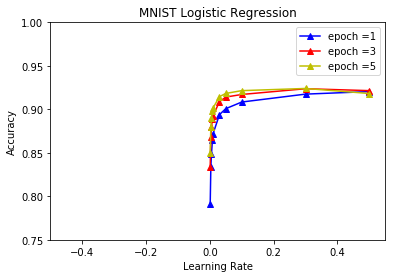

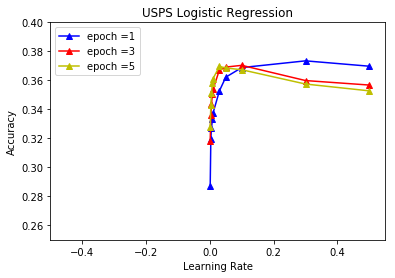

In [72]:
import matplotlib.pyplot as plt 
import numpy as np 

mx = [0.001,0.003,0.005,0.008,0.01,0.03,0.05,0.1,0.3,0.5]
my = [0.7908, 0.8333, 0.8489, 0.8646, 0.8719, 0.8939, 0.9008, 0.9084, 0.9175, 0.9204]
my1 = [0.8339, 0.8681, 0.8798, 0.8886, 0.8925, 0.9088, 0.9141, 0.9171, 0.9237, 0.9215]
my2 = [0.8497, 0.8797, 0.8898, 0.898, 0.9016, 0.9146, 0.9183, 0.9215, 0.924, 0.9182]
my3 = [0.8658, 0.8891, 0.8981, 0.9057, 0.9082, 0.9175, 0.92, 0.9221, 0.9216, 0.9239]

# epochs number blue = 1, red =3, yellow = 5, green =8


plt.plot(mx, my, 'b^', label ="epoch =1", linestyle='-')
plt.plot(mx, my1, 'r^', label ="epoch =3", linestyle='-')
plt.plot(mx, my2, 'y^',label = "epoch =5", linestyle='-')
#plt.plot(mx, my3, 'g^',label = "epoch = 8", linestyle='-')
plt.legend()
plt.axis([-0.5, 0.55, 0.75, 1])
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('MNIST Logistic Regression')
plt.show()



ux = [0.001,0.003,0.005,0.008,0.01,0.03,0.05,0.1,0.3,0.5]
uy = [0.2869, 0.3197, 0.32725, 0.33315, 0.3375, 0.3528, 0.3622, 0.3688, 0.37345, 0.36975]
uy1 = [0.3183, 0.33585, 0.3436, 0.35065, 0.3538, 0.36725, 0.36915, 0.37035, 0.35985, 0.35675]
uy2 = [0.32755, 0.34285, 0.3511, 0.35805, 0.36125, 0.3696, 0.36855, 0.3673, 0.35745, 0.35275]
uy3 = [0.3338, 0.35015, 0.3591, 0.36395, 0.36665, 0.3681, 0.3677, 0.36185, 0.3584, 0.35205]

# epochs number blue = 1, red =3, yellow = 5, green =8

plt.figure(2)
plt.plot(ux, uy, 'b^', label ="epoch =1", linestyle='-')
plt.plot(ux, uy1, 'r^', label ="epoch =3", linestyle='-')
plt.plot(ux, uy2, 'y^',label = "epoch =5", linestyle='-')
#plt.plot(ux, uy3, 'g^',label = "epoch = 8", linestyle='-')
plt.legend()
plt.axis([-0.5, 0.55, 0.25, 0.4])
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('USPS Logistic Regression')
plt.show()

## Confusion Matrix

In [1]:
from sklearn.metrics import confusion_matrix,classification_report
print("Confusion Matrix for SVM: Validation_MNIST")
print(confusion_matrix(y_valid,pred_svm_valid))
print("Confusion Matrix for SVM: Testing_MNIST")
print(confusion_matrix(y_test,pred_svm_test))
print("Confusion Matrix for SVM: Testing_USPS" )
print(confusion_matrix(USPSTar,pred_svm_USPS))


#----- X -------

print("Confusion Matrix for Random Forest: Validation_MNIST")
print(confusion_matrix(X_valid,y_valid))
print("Confusion Matrix for Random Forest: Testing_MNIST")
print(confusion_matrix(X_test,y_test))
print("Confusion Matrix for Random Forest: Testing_USPS" )
print(confusion_matrix(USPSMat,USPSTar))


#----- X -------

print("Confusion Matrix for Neural Networks: Testing_USPS" )
print(confusion_matrix(usps_mat_data,USPSTar))

#----- X -------

print("Confusion Matrix for Logistic Regression: Testing_USPS" )
print(confusion_matrix(test_usps_acc,USPSTar))

#----- X -------

print("Confusion Matrix for majority voting" )
print(confusion_matrix(major,USPSTar))

Confusion Matrix for SVM: Validation_MNIST


NameError: name 'y_valid' is not defined